<a href="https://colab.research.google.com/github/Colmirage/AlgorithmsUN2024I/blob/main/Lab10/BubbleSortOptDistributionWithRepGroup3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bubble sort not optimized time complexity, and time complexity histograms for permutations of n different elements

## Best case - Increasingly sorted array [1,2,...,n]

$$\frac{(n-1)n}{2}  = \frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$  \ \ \ \ \ \ \ \ \ \    0 \ \ \ \ \ \ \  \text{swaps}  \ \ \ \ $$

$$T_b(n) = \frac{n^2-n}{2} = \Theta(n^2) $$

## Worst case - decreasingly sorted array [n,n-1,...,1]

$$\frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$ \frac{n^2-n}{2} \ \ \ \ \text{swaps}\ \ \ \ \ \ \ $$

$$T_w(n) = n^2-n = \Theta(n^2) $$

## Average case over unifrom permutations of n different elements

$$\frac{n^2-n}{2} \ \ \ \text{constant comparisons - average is the same }$$
$$ +$$
$$ \frac{n^2-n}{4} \ \ \ \ \ \  \text{average swaps} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$

$$T_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$



In [2]:
from itertools import permutations

n = 3
perm = permutations(range(1,n+1))

c = 0
# Print the obtained permutations
for i in perm:
    print(i)
    c += 1

print(c)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)
6


In [1]:
# https://www.geeksforgeeks.org/bubble-sort/ no optimized adding comaprisons, swaps, steps and passes counters, also fixing "for i in range(n-1):"
#optimizada con repetición
def bubbleSortNotOptAllCounters(arr):
    comps = 0
    swaps = 0
    steps = 0
    passes = 0
    n = len(arr)

    # Traverse through all array elements
    for i in range(n-1):
        passes += 1
        swapped = False  # Flag to indicate if any swaps were made in this pass

        # Last i elements are already in place
        for j in range(0, n-i-1):

            # Traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            comps += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swaps += 1
                swapped = True  # Set the flag to True if a swap is made

        # If no swaps were made in this pass, the array is already sorted
        if not swapped:
            break

    steps = comps + swaps
    return comps, swaps, steps, passes


In [3]:
def maxinversions(arr):
  maxinv = 0
  n = len(arr)
  for i in range(n-1):
    inv = 0
    for j in range(i+1,n):
      if arr[j] < arr[i]:
        inv +=1
    if inv > maxinv:
      maxinv = inv
  return maxinv




n 3
number of permutations n! = 6



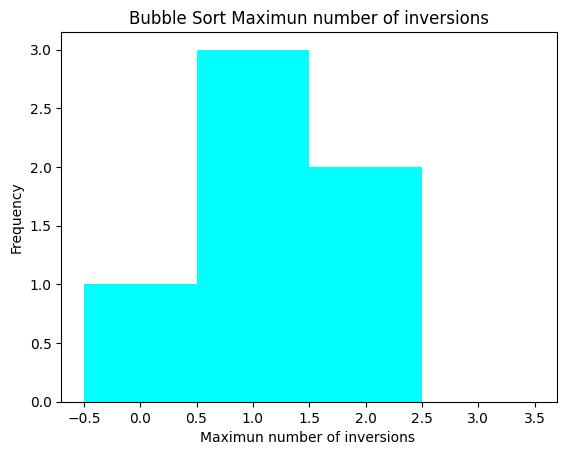

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 2
Maximun number of inversions formula max n-1 = 2
Maximun number of inversions exper mean = 1.1666666666666667
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 0.8291962363251972
Maximun number of inversions exper stdev = 0.6871842709362768



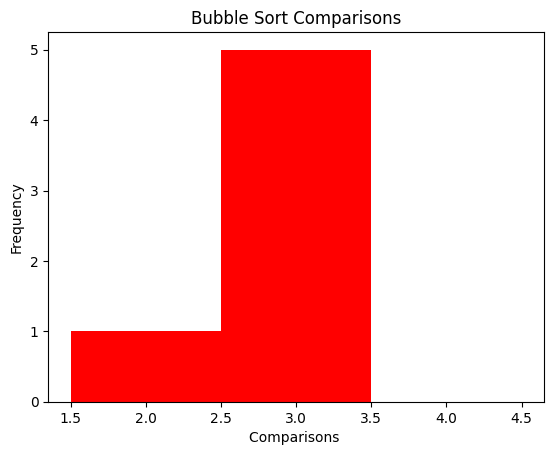

Comparisons
Comparisons formula (n-1)*n/2 = 3.0
Comparisons exper min = 2
Comparisonsexper max = 3
Comparisons exper mean = 2.8333333333333335
Comparisons exper stdev = 0.3726779962499649



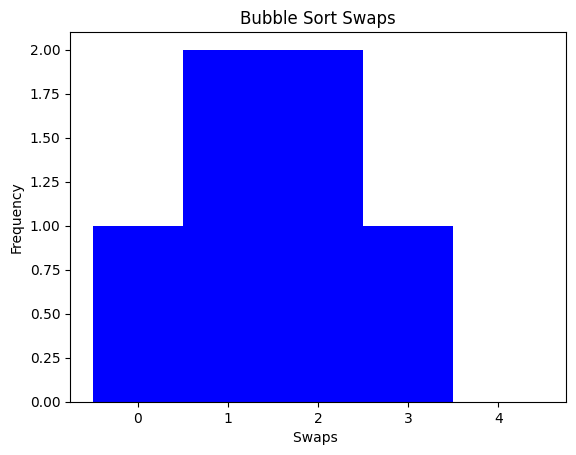

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 3
Swaps max formula (n-1)*n/2 = 3.0
Swaps exper mean = 1.5
Swaps mean formula (n-1)*n/4 = 1.5
Swaps exper stdev = 0.9574271077563381



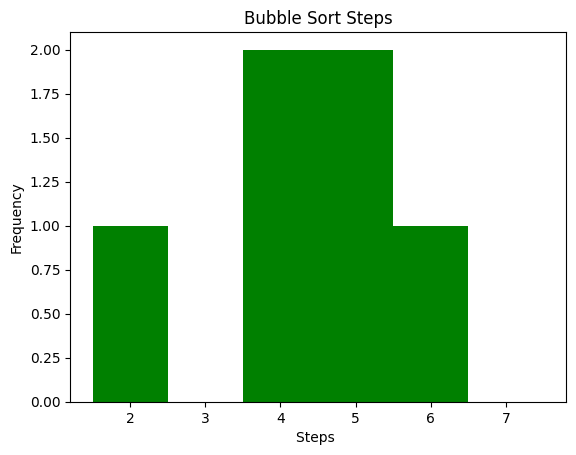

Steps
Steps exper min = 2
Steps min formula (n-1)*n/2 = 3.0
Steps exper max = 6
Steps max formula (n-1)*n = 6
Steps exper mean = 4.333333333333333
Steps mean formula (3/4)*(n**2-n) = 4.5
Steps exper stdev 1.247219128924647



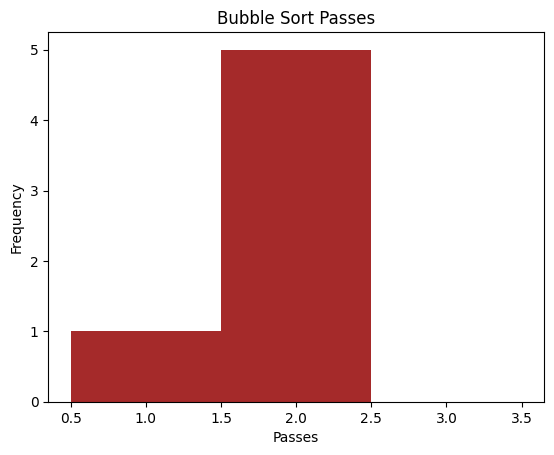

Passes
Passes formula (n-1) = 2
Passes exper min = 1
Passes exper max = 2
Passes exper mean = 1.8333333333333333
Passes exper stdev 0.3726779962499649


In [4]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n = 3
perm = permutations(range(1,n+1))

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortNotOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 8
number of permutations n! = 40320



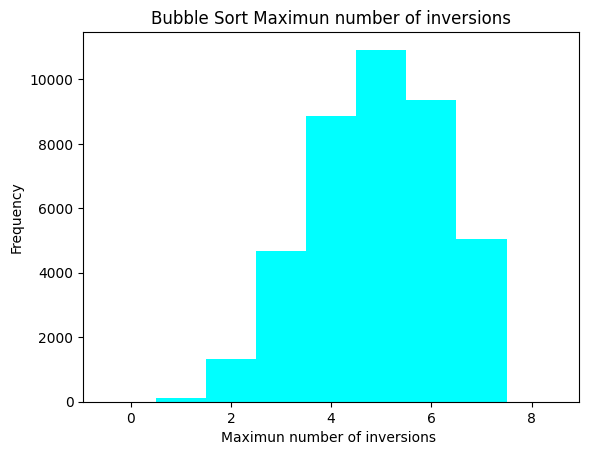

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 7
Maximun number of inversions formula max n-1 = 7
Maximun number of inversions exper mean = 4.9183779761904765
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 4.455092298188968
Maximun number of inversions exper stdev = 1.3258568463357079



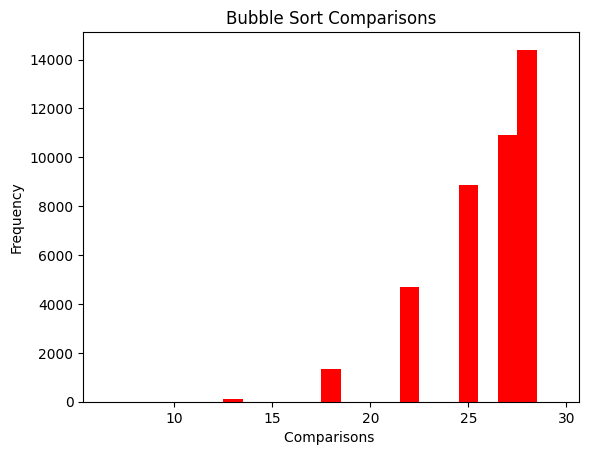

Comparisons
Comparisons formula (n-1)*n/2 = 28.0
Comparisons exper min = 7
Comparisonsexper max = 28
Comparisons exper mean = 25.9952876984127
Comparisons exper stdev = 2.5359278726269268



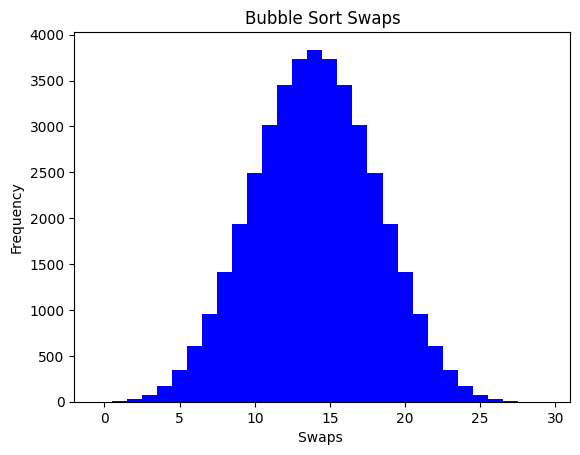

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 28
Swaps max formula (n-1)*n/2 = 28.0
Swaps exper mean = 14.0
Swaps mean formula (n-1)*n/4 = 14.0
Swaps exper stdev = 4.041451884327381



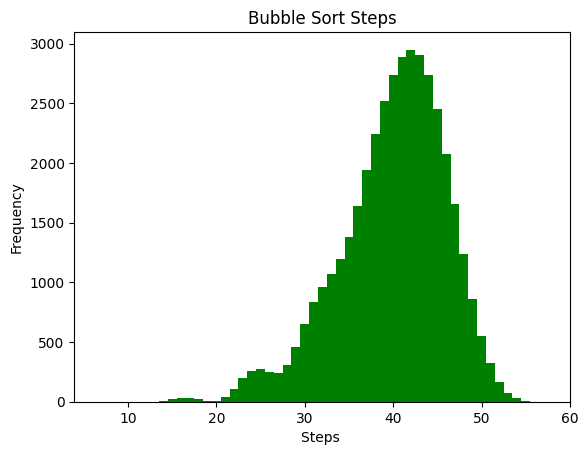

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 39.995287698412696
Steps mean formula (3/4)*(n**2-n) = 42.0
Steps exper stdev 6.019608964038115



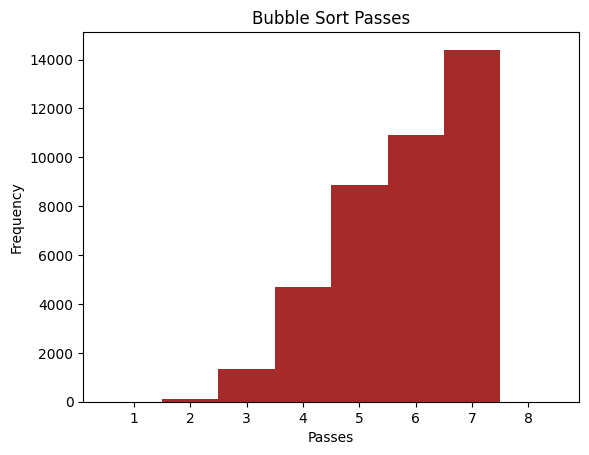

Passes
Passes formula (n-1) = 7
Passes exper min = 1
Passes exper max = 7
Passes exper mean = 5.7933779761904765
Passes exper stdev 1.1605455057958254


In [5]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
perm = permutations(range(1,n+1))

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortNotOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 10
number of permutations n! = 3628800



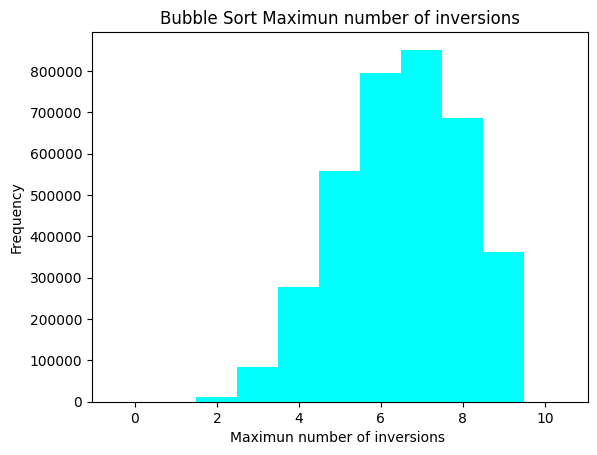

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 9
Maximun number of inversions formula max n-1 = 9
Maximun number of inversions exper mean = 6.5211698082010585
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 6.0366727023939895
Maximun number of inversions exper stdev = 1.5322720434814578



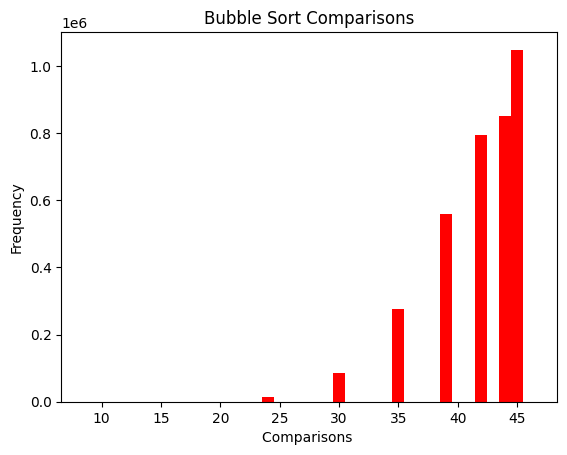

Comparisons
Comparisons formula (n-1)*n/2 = 45.0
Comparisons exper min = 9
Comparisonsexper max = 45
Comparisons exper mean = 41.99318672839506
Comparisons exper stdev = 3.6405715071337372



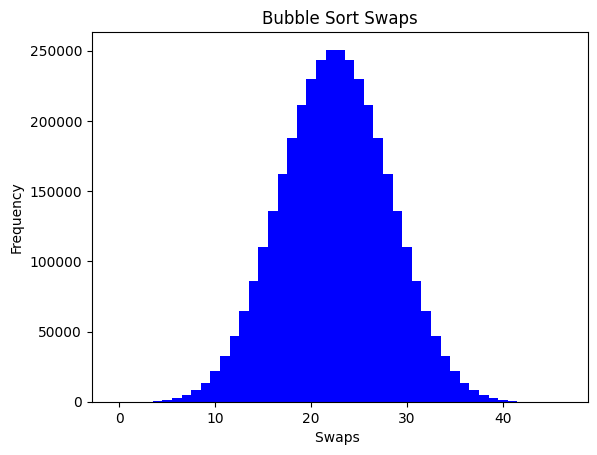

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 45
Swaps max formula (n-1)*n/2 = 45.0
Swaps exper mean = 22.5
Swaps mean formula (n-1)*n/4 = 22.5
Swaps exper stdev = 5.5901699437494745



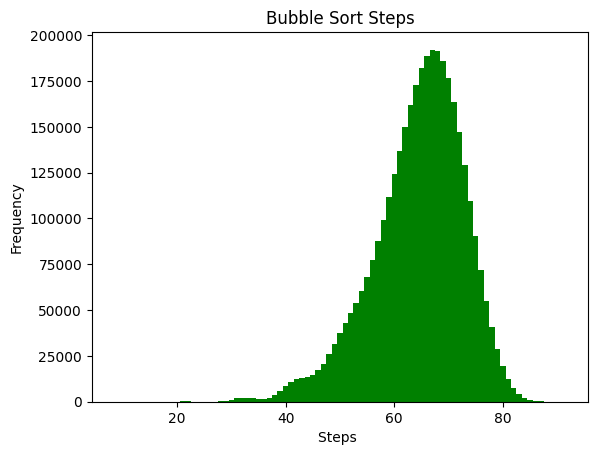

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 45.0
Steps exper max = 90
Steps max formula (n-1)*n = 90
Steps exper mean = 64.49318672839506
Steps mean formula (3/4)*(n**2-n) = 67.5
Steps exper stdev 8.352008300078836



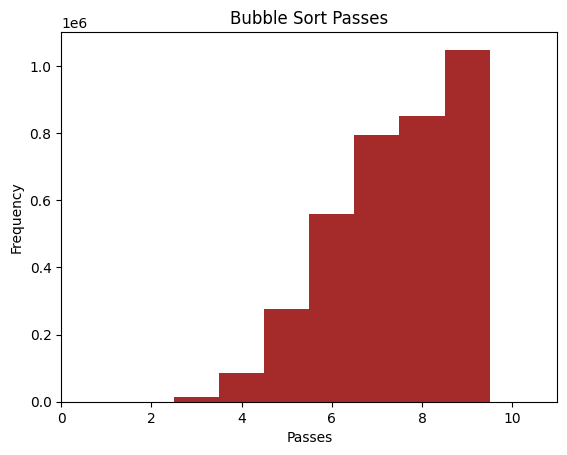

Passes
Passes formula (n-1) = 9
Passes exper min = 1
Passes exper max = 9
Passes exper mean = 7.421169808201058
Passes exper stdev 1.39358945779417


In [6]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n = 10
perm = permutations(range(1,n+1))

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortNotOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

In [7]:
# https://www.geeksforgeeks.org/bubble-sort/ no optimized adding only a steps counter, also fixing "for i in range(n-1):"
#optimizado con repetición
def bubbleSortNotOptSteps(arr):
    steps = 0
    n = len(arr)

    # Traverse through all array elements
    for i in range(n-1):
        swapped = False  # Flag to indicate if any swaps were made in this pass

        # Last i elements are already in place
        for j in range(0, n-i-1):

            # Traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            steps += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                steps += 1
                swapped = True  # Set the flag to True if a swap is made

        # If no swaps were made in this pass, the array is already sorted
        if not swapped:
            break

    return steps


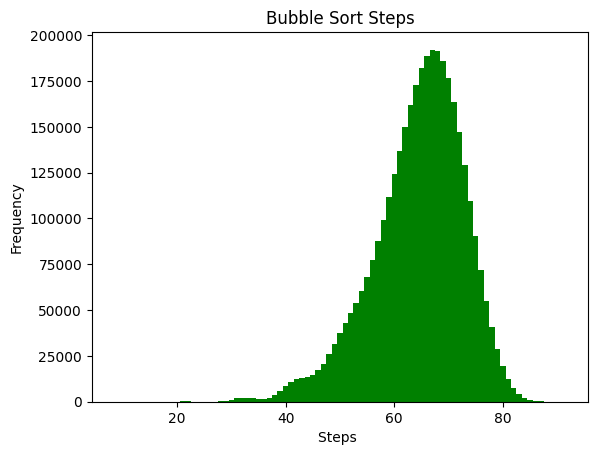

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 6.0
Steps exper max = 90
Steps max formula (n-1)*n = 12
Steps exper mean = 64.49318672839506
Steps mean formula (3/4)*(n**2-n) = 9.0
Steps exper stdev 8.352008300078836



In [8]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n = 4
perm = permutations(range(1,n+1))

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortNotOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

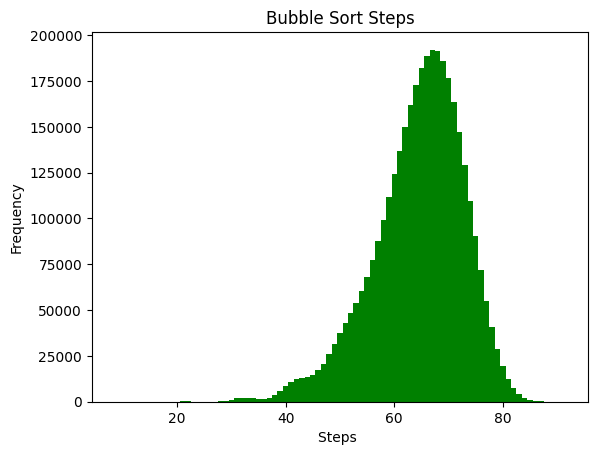

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 90
Steps max formula (n-1)*n = 56
Steps exper mean = 64.49318672839506
Steps mean formula (3/4)*(n**2-n) = 42.0
Steps exper stdev 8.352008300078836



In [9]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
perm = permutations(range(1,n+1))

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortNotOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

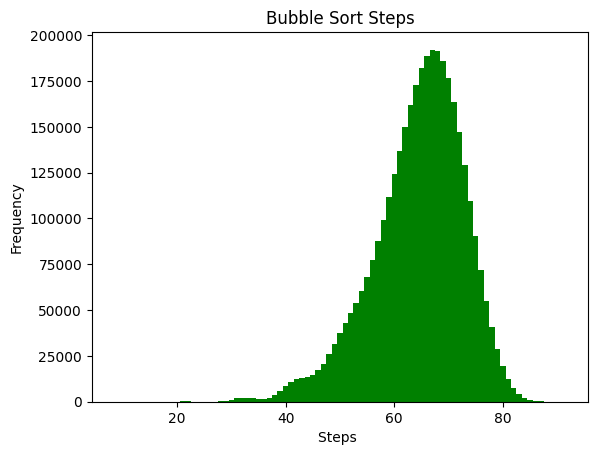

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 45.0
Steps exper max = 90
Steps max formula (n-1)*n = 90
Steps exper mean = 64.49318672839506
Steps mean formula (3/4)*(n**2-n) = 67.5
Steps exper stdev 8.352008300078836



In [10]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import math

n = 10
perm = permutations(range(1,n+1))

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortNotOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

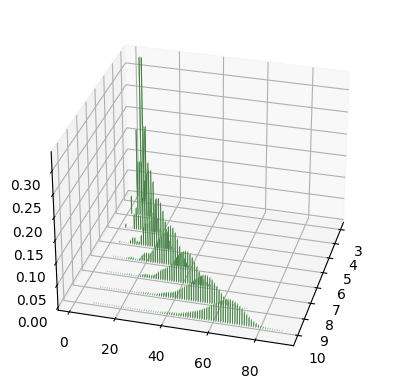

In [12]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bubbleSortNotOptSteps(arr):
    steps = 0
    n = len(arr)
    for i in range(n-1):
        swapped = False
        for j in range(0, n-i-1):
            steps += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                steps += 1
                swapped = True
        if not swapped:
            break
    return steps

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 10

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3, N + 1, 1):
    A = range(n)
    times = []

    for P in permutations(A):
        t = bubbleSortNotOptSteps(list(P))
        times.append(t)

    b = np.array(range(min(times)-1, max(times)+1)) + 0.5
    hist, bin_edges = np.histogram(times, bins=b, density=True)

    for i in range(len(hist)):
        x.append(n)
        y.append(bin_edges[i])
        z.append(0)
        dx.append(0.1)
        dy.append(0.1)
        dz.append(hist[i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()


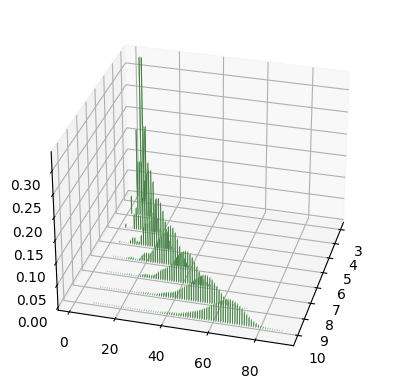

In [14]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bubbleSortNotOptSteps(arr):
    steps = 0
    n = len(arr)
    for i in range(n-1):
        swapped = False
        for j in range(0, n-i-1):
            steps += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                steps += 1
                swapped = True
        if not swapped:
            break
    return steps

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 10

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3, N + 1, 1):
    A = range(n)
    times = []

    for P in permutations(A):
        t = bubbleSortNotOptSteps(list(P))
        times.append(t)

    b = np.array(range(min(times) - 1, max(times) + 1)) + 0.5
    hist, bin_edges = np.histogram(times, bins=b, density=True)

    for i in range(len(hist)):
        x.append(n)
        y.append(bin_edges[i])
        z.append(0)
        dx.append(0.1)
        dy.append(0.1)
        dz.append(hist[i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()


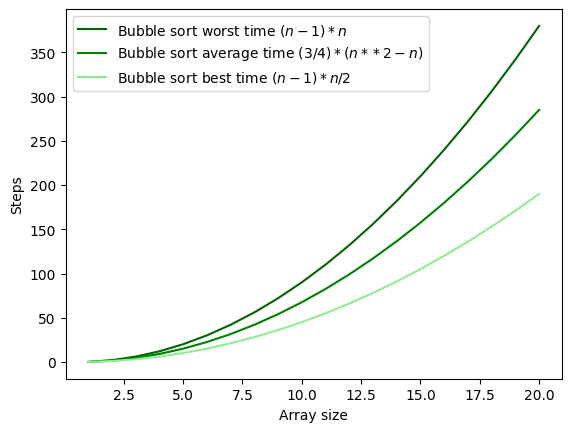

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, (n-1)*n,  label = 'Bubble sort worst time $(n-1)*n$', color='darkgreen')
plt.plot(n, (3/4)*(n**2-n), label = 'Bubble sort average time $(3/4)*(n**2-n)$', color='green')
plt.plot(n, (n-1)*n/2, label = 'Bubble sort best time $(n-1)*n/2$',color='lightgreen')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')


# Average case - expected number of comparisons + swaps on random unifrom permtation of n diferent elements

$$t_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$

In [16]:
# Average case on random unifrom permtation of  3/4 (n**2 -n)
import numpy as np
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments
t = np.array([4.5,9.0, 15.0,22.5]) # Average comparisons + swaps for the corresponding n

data = pd.DataFrame({'n': n, 't': t})
data



,n,t
0,3.0,4.5
1,4.0,9.0
2,5.0,15.0
3,6.0,22.5


In [17]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.  , -0.75,  0.75,  0.  ])

# Bubble sort not optimized time complexity, and time complexity histograms for permutations of n elements  with repetions

## Best case - Increasingly sorted array [1,2,...,n]

$$\frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$ 0 \ \ \ \ \ \ \  \text{swaps}  \ \ \ \ $$

$$T_b(n) = \frac{n^2-n}{2} = \Theta(n^2) $$

## Worst case - decreasingly sorted array [n,n-1,...,1]

$$\frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$ \frac{n^2-n}{2} \ \ \ \ \text{swaps}\ \ \ \ \ \ \ $$

$$T_w(n) = n^2-n = \Theta(n^2) $$

## Average case over unifrom permutations of n different elements

$$\frac{n^2-n}{2} \ \ \ \text{constant comparisons - average is the same }$$
$$ +$$
$$ \frac{1}{4}n^2 -\frac{1}{2} n+\frac{1}{4}  \ \ \ \ \ \  \text{average swaps} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$

$$T_a(n) = \frac{3}{4}n^2-n +\frac{1}{4}= \Theta(n^2) $$

In [18]:
from itertools import product

n=3
perm = product(range(1,n+1), repeat = n)

c=0
for i in perm:
    print(i)
    c+=1

print(c)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
27


n 3
number of permutations n! = 6



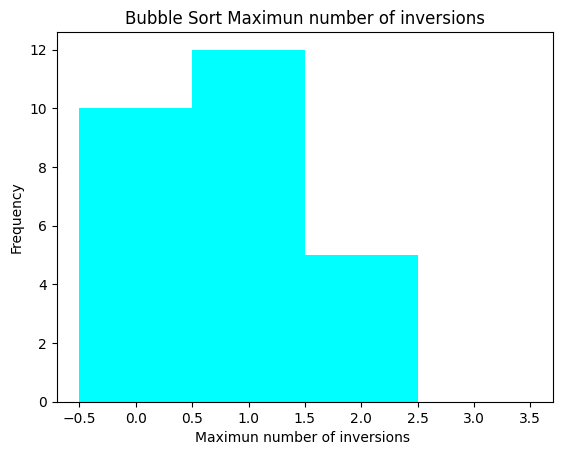

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 2
Maximun number of inversions formula max n-1 = 2
Maximun number of inversions exper mean = 0.8148148148148148
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 0.8291962363251972
Maximun number of inversions exper stdev = 0.7219847662821455



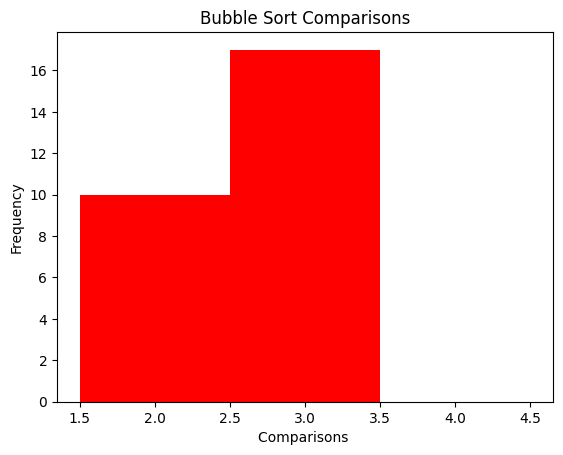

Comparisons
Comparisons formula (n-1)*n/2 = 3.0
Comparisons exper min = 2
Comparisonsexper max = 3
Comparisons exper mean = 2.6296296296296298
Comparisons exper stdev = 0.4829038818668629



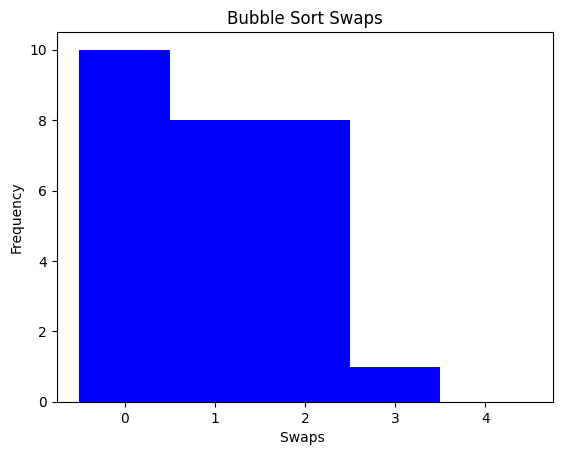

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 3
Swaps max formula (n-1)*n/2 = 3.0
Swaps exper mean = 1.0
Swaps mean formula (1/4*n**2)- (1/2*n)+(1/4) = 1.0
Swaps exper stdev = 0.90267093384844



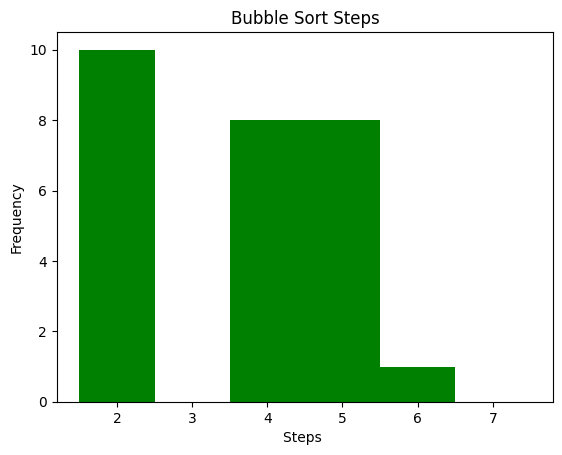

Steps
Steps exper min = 2
Steps min formula (n-1)*n/2 = 3.0
Steps exper max = 6
Steps max formula (n-1)*n = 6
Steps exper mean = 3.6296296296296298
Steps mean formula (3/4*n**2)-n+(1/4) = 4.0
Steps exper stdev 1.3374422285383547



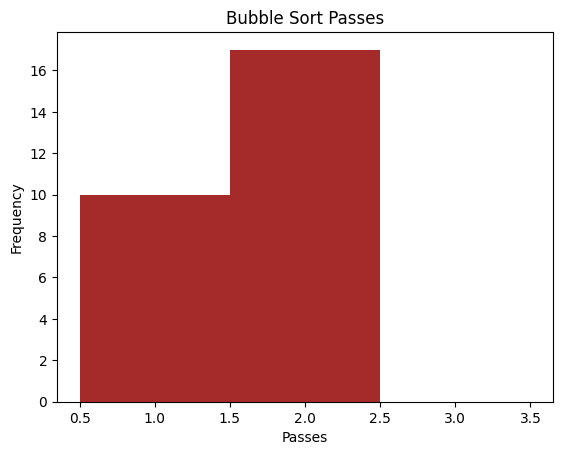

Passes
Passes formula (n-1) = 2
Passes exper min = 1
Passes exper max = 2
Passes exper mean = 1.6296296296296295
Passes exper stdev 0.48290388186686284


In [19]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 3
perm = product(range(1,n+1), repeat = n)

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortNotOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (1/4*n**2)- (1/2*n)+(1/4) =",(1/4*n**2)- (1/2*n)+(1/4))
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4*n**2)-n+(1/4) =",(3/4*n**2)-n+(1/4))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 5
number of permutations n! = 120



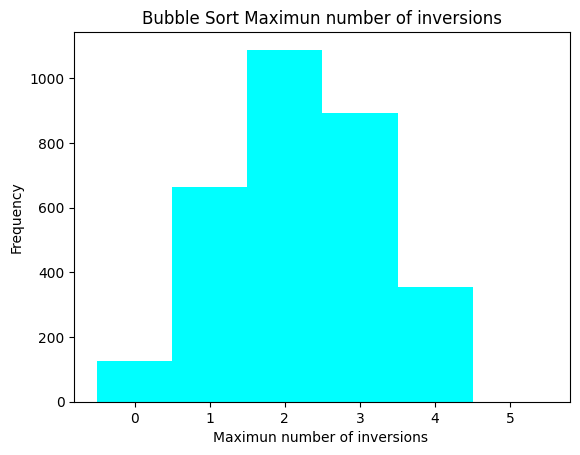

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 4
Maximun number of inversions formula max n-1 = 4
Maximun number of inversions exper mean = 2.21856
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 2.1975043918010355
Maximun number of inversions exper stdev = 1.031926124487601



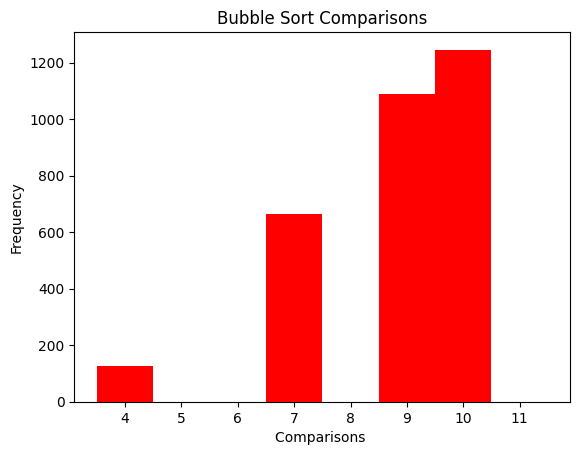

Comparisons
Comparisons formula (n-1)*n/2 = 10.0
Comparisons exper min = 4
Comparisonsexper max = 10
Comparisons exper mean = 8.77152
Comparisons exper stdev = 1.485165610159352



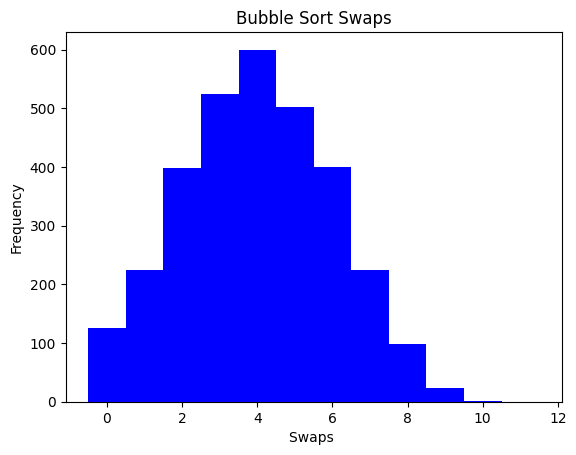

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 10
Swaps max formula (n-1)*n/2 = 10.0
Swaps exper mean = 4.0
Swaps mean formula (1/4*n**2)- (1/2*n)+(1/4) = 4.0
Swaps exper stdev = 2.0



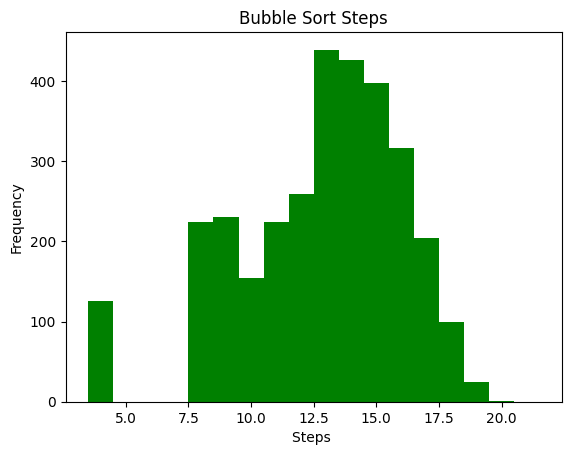

Steps
Steps exper min = 4
Steps min formula (n-1)*n/2 = 10.0
Steps exper max = 20
Steps max formula (n-1)*n = 20
Steps exper mean = 12.77152
Steps mean formula (3/4*n**2)-n+(1/4) = 14.0
Steps exper stdev 3.2691951440071607



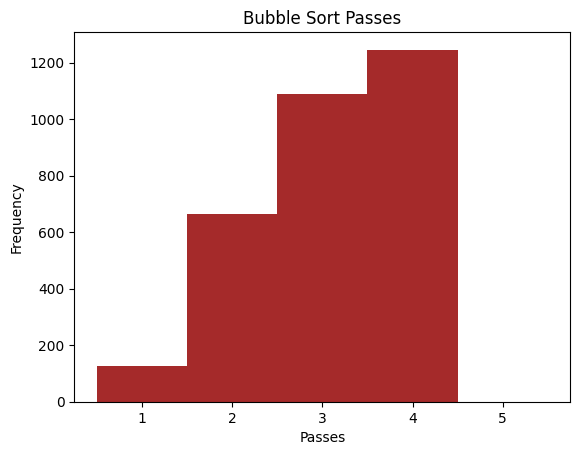

Passes
Passes formula (n-1) = 4
Passes exper min = 1
Passes exper max = 4
Passes exper mean = 3.10528
Passes exper stdev 0.8727634969451918


In [20]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 5
perm = product(range(1,n+1), repeat = n)

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortNotOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (1/4*n**2)- (1/2*n)+(1/4) =",(1/4*n**2)- (1/2*n)+(1/4))
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4*n**2)-n+(1/4) =",(3/4*n**2)-n+(1/4))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 8
number of permutations n! = 40320



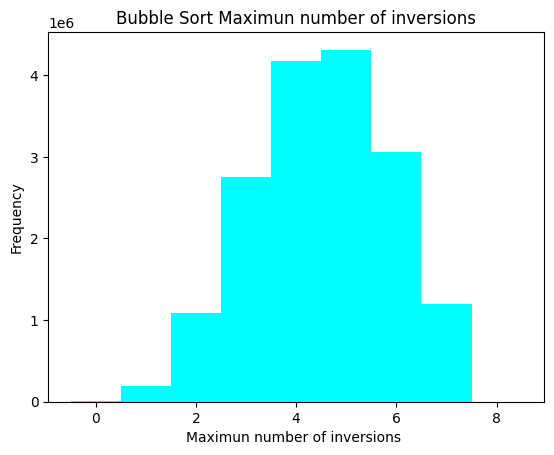

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 7
Maximun number of inversions formula max n-1 = 7
Maximun number of inversions exper mean = 4.506802499294281
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 4.455092298188968
Maximun number of inversions exper stdev = 1.3795120518929025



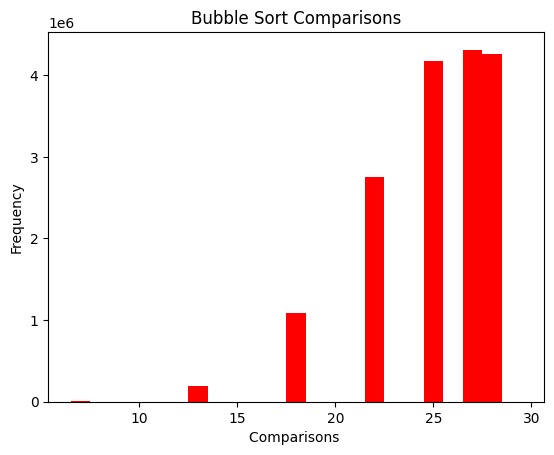

Comparisons
Comparisons formula (n-1)*n/2 = 28.0
Comparisons exper min = 7
Comparisonsexper max = 28
Comparisons exper mean = 25.187055110931396
Comparisons exper stdev = 3.1098130811715317



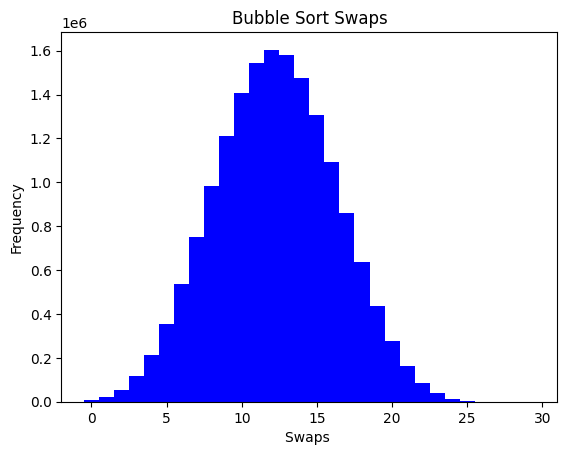

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 28
Swaps max formula (n-1)*n/2 = 28.0
Swaps exper mean = 12.25
Swaps mean formula (1/4*n**2)- (1/2*n)+(1/4) = 12.25
Swaps exper stdev = 4.00975373308636



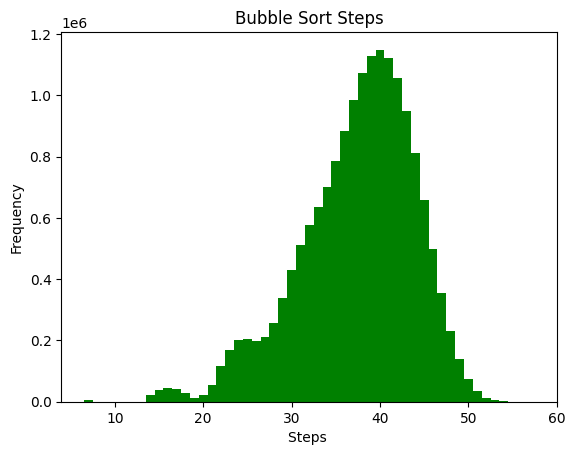

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 37.4370551109314
Steps mean formula (3/4*n**2)-n+(1/4) = 40.25
Steps exper stdev 6.511226704934139



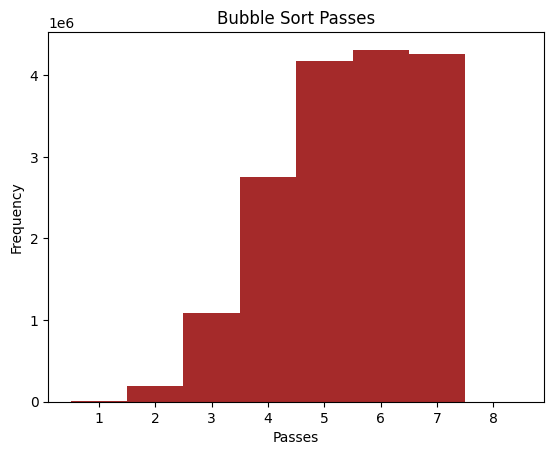

Passes
Passes formula (n-1) = 7
Passes exper min = 1
Passes exper max = 7
Passes exper mean = 5.4352588057518005
Passes exper stdev 1.2699344781963453


In [21]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
perm = product(range(1,n+1), repeat = n)

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortNotOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (1/4*n**2)- (1/2*n)+(1/4) =",(1/4*n**2)- (1/2*n)+(1/4))
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4*n**2)-n+(1/4) =",(3/4*n**2)-n+(1/4))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

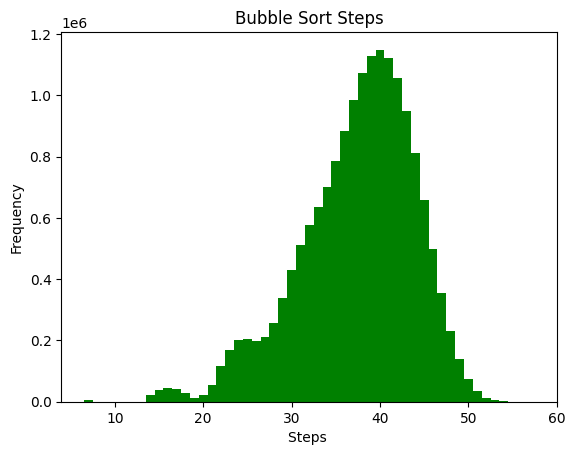

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 3.0
Steps exper max = 56
Steps max formula (n-1)*n = 6
Steps exper mean = 37.4370551109314
Steps mean formula (3/4*n**2)-n+(1/4) = 4.0
Steps exper stdev 6.511226704934139



In [22]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

n = 3
perm = product(range(1,n+1), repeat = n)

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortNotOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4*n**2)-n+(1/4) =",(3/4*n**2)-n+(1/4))
print("Steps exper stdev",np.std(steps))
print()

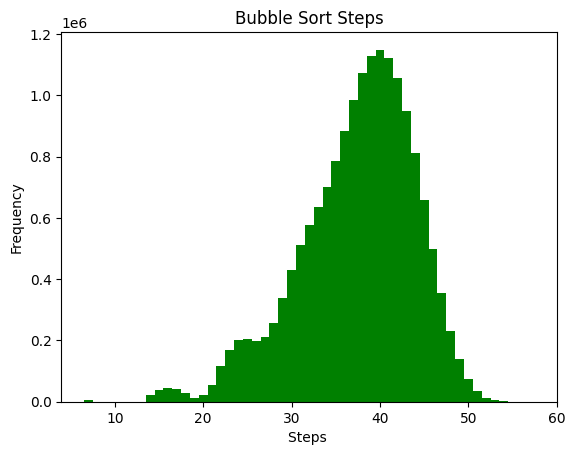

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 10.0
Steps exper max = 56
Steps max formula (n-1)*n = 20
Steps exper mean = 37.4370551109314
Steps mean formula (3/4*n**2)-n+(1/4) = 14.0
Steps exper stdev 6.511226704934139



In [23]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

n = 5
perm = product(range(1,n+1), repeat = n)

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortNotOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4*n**2)-n+(1/4) =",(3/4*n**2)-n+(1/4))
print("Steps exper stdev",np.std(steps))
print()

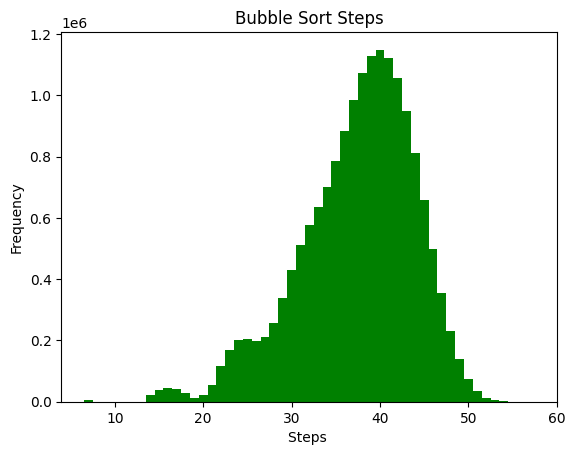

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 37.4370551109314
Steps mean formula (3/4*n**2)-n+(1/4) = 40.25
Steps exper stdev 6.511226704934139



In [24]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

n = 8
perm = product(range(1,n+1), repeat = n)

times =  []
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSortNotOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4*n**2)-n+(1/4) =",(3/4*n**2)-n+(1/4))
print("Steps exper stdev",np.std(steps))
print()

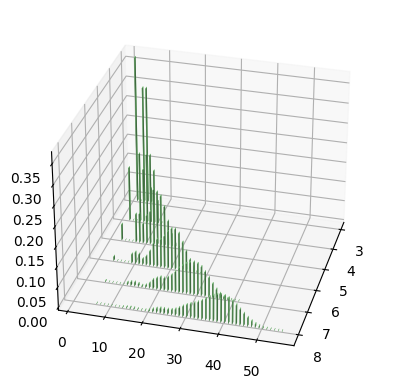

In [26]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 8

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3, N + 1, 1):
    A = range(n)
    times = []

    for P in product(A, repeat=n):
        # Suponiendo que bubbleSortNotOptSteps es una función existente
        t = bubbleSortNotOptSteps(list(P))
        times.append(t)

    b = np.array(range(min(times) - 1, max(times) + 1)) + 0.5
    hist, bin_edges = np.histogram(times, bins=b, density=True)

    for i in range(len(hist)):
        x.append(n)
        y.append(bin_edges[i])
        z.append(0)
        dx.append(0.1)
        dy.append(0.1)
        dz.append(hist[i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()


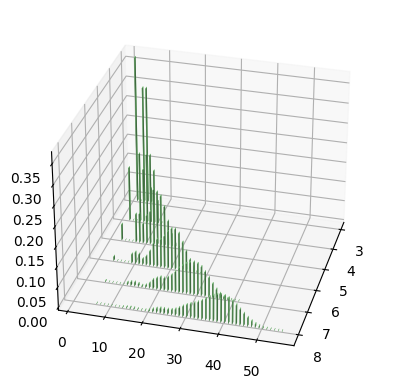

In [28]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 8

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3, N+1, 1):
    A = range(n)
    times = []

    for P in product(A, repeat=n):
        t = bubbleSortNotOptSteps(list(P))
        times.append(t)

    b = np.array(range(min(times)-1, max(times)+1)) + 0.5
    hist, bin_edges = np.histogram(times, bins=b)
    hist = hist / np.sum(hist)  # Normalizar el histograma

    for i in range(len(hist)):
        x.append(n)
        y.append(bin_edges[i])
        z.append(0)
        dx.append(0.1)
        dy.append(0.1)
        dz.append(hist[i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()


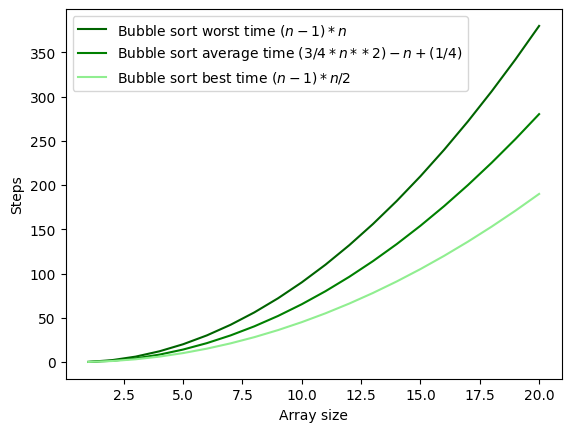

In [29]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, (n-1)*n,  label = 'Bubble sort worst time $(n-1)*n$', color='darkgreen')
plt.plot(n, (3/4*n**2)-n+(1/4), label = 'Bubble sort average time $(3/4*n**2)-n+(1/4)$', color='green')
plt.plot(n, (n-1)*n/2, label = 'Bubble sort best time $(n-1)*n/2$',color='lightgreen')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')

# Average case - expected number of comparisons + swaps on random unifrom permtation of n   elements with repetitions

$$t_a(n) = \frac{3}{4}n^2 - n +\frac{1}{4}= \Theta(n^2) $$

In [30]:
# Average case on random unifrom permutation of $n$ elements with repetitions $t_a(n) = \frac{3}{4}n^2 - n +\frac{1}{4}= \Theta(n^2) $
import numpy as np
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments
t = np.array([4.0 ,8.25,14.0,21.25]) # Average comparisons + swaps for the corresponding n

data = pd.DataFrame({'n': n, 't': t})
data


,n,t
0,3.0,4.00
1,4.0,8.25
2,5.0,14.00
3,6.0,21.25


In [31]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.25, -1.  ,  0.75,  0.  ])